# Trabajo Dataset Python

Marcos Quintas Pérez

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

## Presentacion del Dataset

El DataSet escogido ha sido obtenido de la plataforma Kaggle y se llama "Student Habits vs Academic Performance". Dicho dataset contiene datos simulados, aunque realistas, de medidas de diferentes habitos de los estudiantes como el numero de horas de sueño y estudio diarias, asi como de uso de redes sociales y de Netflix, y la nota final obtenida por el estudiante. El Dataset puede ser encontrado en el siguiente enlace de kaggle

https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data

Al ser datos simulados, este Dataset no tienen missing values (Nan), por lo que en este trabajo nos centraremos mas en el estudio estadisitco y la visualizacion de los datos, para obtener conclusiones

## Objetivos

Los objetivos del analisis de este DataSet son los siguientes

1. Analizar qué variables están más asociadas con el rendimiento académico de los estudiantes, medido a través de la nota de los exámenes.

2. Estudiar la influencia del uso de redes sociales, el consumo de contenido en plataformas de streaming (Netflix) y la calidad de la dieta sobre el número de horas de sueño de los estudiantes.

3. Analizar si se puede decir que hay una asociacion entre calidad de la dieta y rendimiento academico

4. Analizar el efecto combinado de las horas de sueño y las horas de estudio sobre el rendimiento académico, evaluando si un buen descanso puede compensar una menor dedicación al estudio.

Se puede observar que el objetivo 1 da lugar al resto de objetivos


## Carga y analsis exploratorio inicial de los datos

Primero cargamos el csv que hemos descargado de kaggle con el dataset con el que vamos a trabajar y lo leemos en un DataFrame

In [87]:
ruta = os.path.join("student_habits_performance.csv")
df = pd.read_csv(ruta, sep=',', header=0)
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


Ahora hacemos un primer analisis exploratorio del dataset

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [89]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [90]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Vemos que efectivamente no existen missing values en el dataset, como era de esperar por la descripcion que teniamos de el

Vamos a analizar si existen valores duplicadosd de student_id, que deberia ser un identificador unico en este DataFrame. Si no tiene duplicados, lo asignaremos como indice del DataFrame

In [91]:
print(df['student_id'].duplicated().any())

False


No hay duplicados de esta columna, entonces la asignamos como indice del DataFrame

In [92]:
df = df.set_index('student_id')

In [93]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

Ahora convertimos los tipos de datos de los objetos que Pandas ha asignado como object, que son aquellos que van por categorias, al tipo de dato categoria para trabajar mejor con ellos despues

In [95]:
df["gender"] = df['gender'].astype('category')
df["part_time_job"] = df['gender'].astype('category')
df["diet_quality"] = df['diet_quality'].astype('category')
df["parental_education_level"] = df['parental_education_level'].astype('category')
df["extracurricular_participation"] = df['extracurricular_participation'].astype('category')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1000 non-null   int64   
 1   gender                         1000 non-null   category
 2   study_hours_per_day            1000 non-null   float64 
 3   social_media_hours             1000 non-null   float64 
 4   netflix_hours                  1000 non-null   float64 
 5   part_time_job                  1000 non-null   category
 6   attendance_percentage          1000 non-null   float64 
 7   sleep_hours                    1000 non-null   float64 
 8   diet_quality                   1000 non-null   category
 9   exercise_frequency             1000 non-null   int64   
 10  parental_education_level       909 non-null    category
 11  internet_quality               1000 non-null   object  
 12  mental_health_rating           100

In [97]:
df["gender"].cat.categories

Index(['Female', 'Male', 'Other'], dtype='object')

In [98]:
df["parental_education_level"].cat.categories

Index(['Bachelor', 'High School', 'Master'], dtype='object')

## 1. Variables influyentes (linealmente) en el rendimiento academico

Ploteamos ahora la matriz de correlcion entre todas las variables numericas para ver la influencia de las unas con las otras. Recordemos que una correlacion cercana a -1 entre un par de variables indica una correlacion negativa y una cercana a 1 una correlacion estadistica positiva

In [99]:
corr_data = df.corr(numeric_only=True)
corr_data.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1, vmin=-1, vmax=1)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


Vemos que entre las variables numericas, la que mas asociada esta con una mayor nota en el examen es claramente el numero de horas de estudio por dia. Tambien hay una cierta asociacion entre la salud mental del estudiante y su rendimiento academico. El resto de variables tienen poca asociacion con la nota de examen. Una explicacion ante tal hallazgo es que la simulacion del dataset haya ensalzado la variable mas clara, que es la horas estudiadas para el examen, y no variables que afectan de forma no tan lineal como las horas de sueño o el tiempo con pantallas digitales. Tambien hay que acalarar que una baja correlacion indica que no hay relacion lineal fuerte, pero no quiere decir que las variables no esten relacionadas realmente. De hecho puede haber relaciones no lineales entre ellas. 

En futuras secciones exploraremos la relacion no lineal entre alguna de estas variables y la nota del examen.

## 2. Relacion entre uso de redes sociales y netflix con el rendimiento academico

Vamos a explorar la relacion no lineal entre el uso de pantallas digitales (netflix y redes sociales) con el rendimiento academico

In [100]:
df['total_hours_pantalla'] = df['netflix_hours'] + df['social_media_hours']

In [101]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_hours_pantalla
student_id,,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,Female,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3
S1001,20,Female,6.9,2.8,2.3,Female,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1
S1002,21,Male,1.4,3.1,1.3,Male,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4
S1003,23,Female,1.0,3.9,1.0,Female,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9
S1004,19,Female,5.0,4.4,0.5,Female,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,Female,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,2.1
S1996,17,Female,2.9,1.0,2.4,Female,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,3.4
S1997,20,Male,3.0,2.6,1.3,Male,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,3.9


In [102]:
df['total_hours_pantalla'].describe()

count    1000.000000
mean        4.325200
std         1.599808
min         0.200000
25%         3.300000
50%         4.400000
75%         5.400000
max        10.100000
Name: total_hours_pantalla, dtype: float64

Vamos ahora a separar los datos segun rangos por el numero total de horas usando pantallas en 3 segmentos y representar las distribuciones correspondientes para comprobar si podemos observar alguna tendencia que relacione el uso de pantallas y el rendimiento academico

In [103]:
labels = ['Poco', 'Moderado', 'Mucho']
bins = [0, 2.5, 4.5, 10.1]
df['tiempo_pantalla_categoria'] = pd.cut(df['total_hours_pantalla'], bins = bins, labels = labels)

In [104]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_hours_pantalla,tiempo_pantalla_categoria
student_id,,,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,Female,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3,Poco
S1001,20,Female,6.9,2.8,2.3,Female,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1,Mucho
S1002,21,Male,1.4,3.1,1.3,Male,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4,Moderado
S1003,23,Female,1.0,3.9,1.0,Female,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9,Mucho
S1004,19,Female,5.0,4.4,0.5,Female,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,Female,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,2.1,Poco
S1996,17,Female,2.9,1.0,2.4,Female,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,3.4,Moderado
S1997,20,Male,3.0,2.6,1.3,Male,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,3.9,Moderado


Checkeamos si se ha formado algun valor nulo (nan) en la categorizacion, porque de ser asi tendriamos que lidiar con el

In [122]:
print(df['tiempo_pantalla_categoria'].isnull().sum())

0


No hay valores nan, por lo que no hace falta hacer mas tratamiento con esta columna. Ahora vamos a usarla para ver en un boxplot, las distribuciones de notas de cada una de las categorias y comprobar si podemos inferir conclusiones de ellas

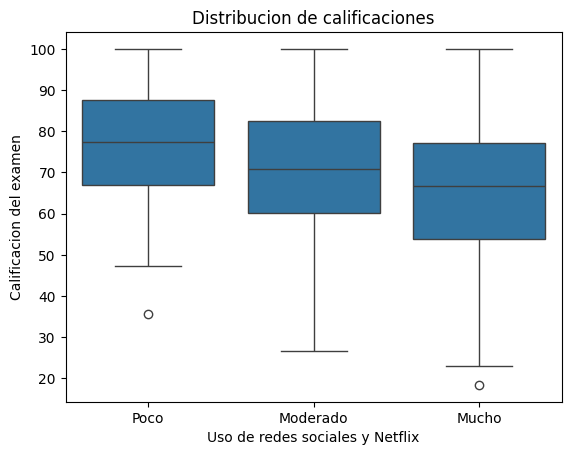

In [123]:
ax = sb.boxplot(x="tiempo_pantalla_categoria", y="exam_score", data=df)

# Set x-axis label
ax.set(xlabel='Uso de redes sociales y Netflix', ylabel='Calificacion del examen', title='Distribucion de calificaciones')

# Display the plot
plt.show()

Aqui obtenemos y resultado un tanto revelador, al observar que efectivamente la mediana de las calificaciones de los alumnos es mas baja en funcion de su consumo de Netflix + redes sociales. Los que consumen "Poco" de Netflix+redes sociales presentantan una distribucion con notas mas altas, como puede verse pues su primer cuartil Q1 y tercer cuartil Q3, asi como su mediana, son mayores que en el caso de las distribuciones de los que hacen un uso "Moderado" o "Mucho" (es decir, alto) de "Netflix+redes sociales. Por lo tanto si vemos una asociacion entre uso de pantallas digitales para entretenimiento y el rendimiento academico.

## 3. Influencia de la calidad de la dieta en el rendimiento academico

Aqui vamos a hacer una analisis de si la dieta parece tener o no una cierta asociacion con el rendimiento academico. Esto se realizara para ejemplificar el uso de agrupaciones y representacion con histogramas vistos en clase

In [106]:
agrupacion_por_dieta = df.groupby('diet_quality', observed = True)

In [107]:
display(agrupacion_por_dieta.mean(numeric_only=True))

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,total_hours_pantalla
diet_quality,,,,,,,,,,
Fair,20.524027,3.643021,2.459725,1.796339,84.490160,6.465217,2.949657,5.208238,70.428833,4.256064
Good,20.492063,3.543386,2.544709,1.823016,83.396296,6.432011,3.105820,5.645503,69.366402,4.367725
Poor,20.448649,3.344324,2.533514,1.868108,84.787568,6.559459,3.129730,5.556757,68.127568,4.401622


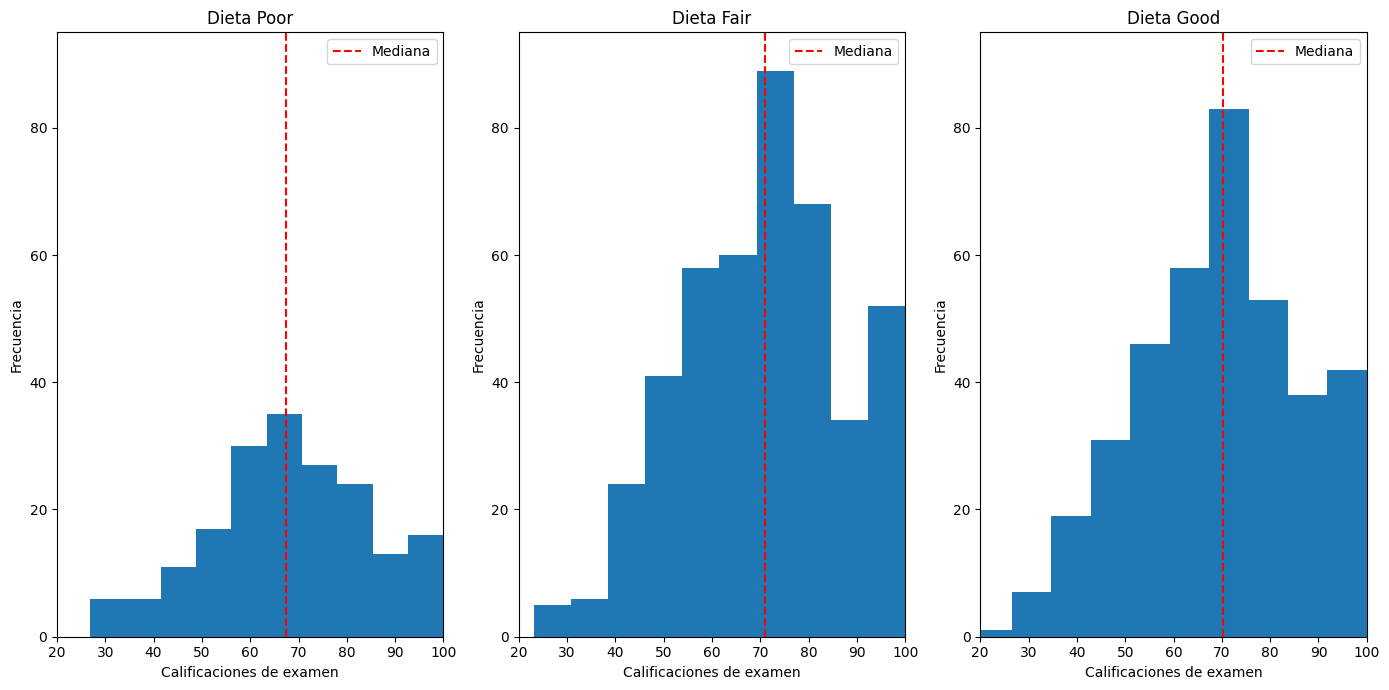

In [108]:
figure, axes = plt.subplots(1,3, figsize=(14, 7))

diet_quality = ['Poor', 'Fair', 'Good']
for ax, dieta in zip(axes, diet_quality):
    grupo_dieta = agrupacion_por_dieta.get_group(dieta)
    ax.hist(grupo_dieta['exam_score'], bins=10)
    ax.axvline(grupo_dieta['exam_score'].median(), color='r', linestyle='--', label='Mediana')
    ax.set_xlim(20, 100) # Set x-axis
    ax.set_ylim(0, 95) # Set y-axis  
    ax.set_title(f'Dieta {dieta}')
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Calificaciones de examen')
    ax.legend()
    
figure.tight_layout() 

La comparacion entre las distribuciones parece indicar que la calidad de la dieta tiene un efecto bastante leve sobre el rendimiento academico, es decir, no parece que a priori haya fuerte asociacion entre ambos. Solo es notable entre los que pasan de una dieta mala ('Poor') a otro de los 2 tipos de dieta ('Fair' o 'Good'). Entre los que tienen una dieta normal o una buena dieta no cambia mucho ni la distribucion ni la mediana. Sin embargo, es de observar que el muestreo de estudiantes que tienen una calidad de dieta pobre es menor que aquellos que la tienen normal o buena, por lo que puede ser que con mas datos las conclusiones fuesen algo diferentes. Esto tambien indica que la mayoria de los estudiantes suele tener, estadisticamente hablando, una dieta decente o buena.

## 4. efecto combinado de las horas de sueño y las horas de estudio sobre el rendimiento académico

Primero categorizamos las horas de sueño y estudio en 3 categorias cada una ("Poco", "Normal", Mucho") usando de nuevo la funcion pd.cut() como hicimos antes en el apartado 2

In [109]:
labels = ['Poco', 'Normal', 'Mucho']
bins = [0, 6, 8, 10]
df['tiempo_sueño'] = pd.cut(df['sleep_hours'], bins = bins, labels = labels)

In [110]:
labels = ['Poco', 'Normal', 'Mucho']
bins = [0, 2, 4, 9]
df['tiempo_estudiado'] = pd.cut(df['study_hours_per_day'], bins = bins, labels = labels)

In [111]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_hours_pantalla,tiempo_pantalla_categoria,tiempo_sueño,tiempo_estudiado
student_id,,,,,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,Female,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3,Poco,Normal,NaN
S1001,20,Female,6.9,2.8,2.3,Female,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1,Mucho,Poco,Mucho
S1002,21,Male,1.4,3.1,1.3,Male,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4,Moderado,Normal,Poco
S1003,23,Female,1.0,3.9,1.0,Female,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9,Mucho,Mucho,Poco
S1004,19,Female,5.0,4.4,0.5,Female,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9,Mucho,Poco,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,Female,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,2.1,Poco,Normal,Normal
S1996,17,Female,2.9,1.0,2.4,Female,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,3.4,Moderado,Normal,Normal
S1997,20,Male,3.0,2.6,1.3,Male,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,3.9,Moderado,Normal,Normal


Ahora checkeamos si hay valores nan en algunas de estas 2 nuevas columnas

In [119]:
print(df['tiempo_estudiado'].isnull().sum())

13


In [120]:
print(df['tiempo_sueño'].isnull().sum())

0


Vemos que hay valores nan en la columna categorica de "tiempo_estudiado". Vamos a ver que ocurre con esos valores

In [128]:
display(df.loc[df['tiempo_estudiado'].isnull(), ['study_hours_per_day', 'tiempo_estudiado']])

,study_hours_per_day,tiempo_estudiado
student_id,,
S1000,0.0,NaN
S1186,0.0,NaN
S1195,0.0,NaN
S1379,0.0,NaN
S1402,0.0,NaN
S1431,0.0,NaN
S1434,0.0,NaN
S1590,0.0,NaN
S1766,0.0,NaN


Vemos que todos ellos tienen una cantidad de 0 horas estudiadas, y entonces nuestro pd.cut() no las categorizo como "Poco" cuando deberia haberlo hehco, pues estos valores se quedaban fuera de rango al estar en el limite. Vamos a ponerlos como "Poco" en dicha columna de tiempo_estudiado

In [134]:
df['tiempo_estudiado'].fillna('Poco', inplace=True)

In [136]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_hours_pantalla,tiempo_pantalla_categoria,tiempo_sueño,tiempo_estudiado
student_id,,,,,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,Female,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3,Poco,Normal,Poco
S1001,20,Female,6.9,2.8,2.3,Female,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1,Mucho,Poco,Mucho
S1002,21,Male,1.4,3.1,1.3,Male,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4,Moderado,Normal,Poco
S1003,23,Female,1.0,3.9,1.0,Female,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9,Mucho,Mucho,Poco
S1004,19,Female,5.0,4.4,0.5,Female,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9,Mucho,Poco,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,Female,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,2.1,Poco,Normal,Normal
S1996,17,Female,2.9,1.0,2.4,Female,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,3.4,Moderado,Normal,Normal
S1997,20,Male,3.0,2.6,1.3,Male,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,3.9,Moderado,Normal,Normal


Ahoar que ya hemos tratado estos nan, vamos a hacer una pivot table con columnas el tiempo de estudio y filas el tiempo de sueño, y donde en cada celda se muestre la media de la nota de los examenes

In [151]:
display(df.pivot_table('exam_score', index='tiempo_sueño', columns='tiempo_estudiado', observed=True))

tiempo_estudiado,Poco,Normal,Mucho
tiempo_sueño,,,
Poco,46.229091,62.673373,81.676389
Normal,47.367500,67.337984,84.743455
Mucho,47.468421,69.670370,89.766667


Estos resultados observados sugieren como un alto numero de horas estudiadas por dia si puede compensar pocas horas de sueño, pero al reves, es decir que muchas horas de sueño compensen una menor cantidad de horas estudiadas, no es cierto. Aparte, se ve que siempre estudiar mas se traduce en mejores resultados academicos, independientemente de cuanto duerma el estudiante. Ahora representamos esta pivot table con un heatmap para hacerlo mas visual e intuitivo

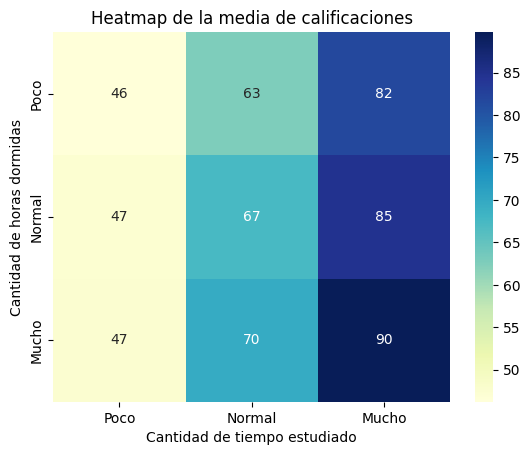

In [153]:
pivottable = df.pivot_table('exam_score', index='tiempo_sueño', columns='tiempo_estudiado',  observed=True)
ax = sb.heatmap(pivottable, annot=True, cmap="YlGnBu")
ax.set(xlabel='Cantidad de tiempo estudiado', ylabel='Cantidad de horas dormidas', title='Heatmap de la media de calificaciones')
plt.show()

## Conclusiones

En el trabajo se han realizado tecnicas de exploracion inicial de datos y parte de su preprocesamiento tipico, asi como tecnicas de tratamiento de datos posteriores tipocas con pandas y de visualizacion de los datos para sacar conclusiones y dar respuestas a los objetivos planteados al inicio de la seccion. Las opciones que proporciona el dataset son inumerables, por lo que podriamos alargar mucho mas el trabajo con mas analisis parecidos a los ya realizados, pero considero que seria alargar innecesariamente el trabajo, y que lo ya realizado muestra un dominio de muchas cosas dadas en el curso, principalmente relacionadas con carga y tratamiento de datos con Pandas, asi como visualizacion de datos. Notar que l pregunta del apartado 1 no se ha respondido completamente en el apartado 1, sino que se ha seguido intentando responder en los siguientes apartados que han dado lugar desde este. Por ultimo y como recordatorio, recordar que los datos de este dataset, aunque parecen bastante realistas, son datos simulados y por ello se ha intentado evitar sacar conclusiones "universales" de los analisis